# Look at data

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#move to correct directory
os.chdir('/Users/isabellasodi/Documents/UCL/PhD/CRUK_datathon_2025')

In [3]:
# load data
#tcr_data = pd.read_csv('input/tcrictionary_tabular.csv' )
tcr_data_raw = pd.read_csv('/Volumes/ritd-ag-project-rd0017-bmcha43/CRUK_datathon_2025/tcrictionary_tabular.csv' )


In [4]:
# pre-process

# only human
tcr_data= tcr_data_raw[ tcr_data_raw['TCR species'] == 'HomoSapiens'].copy()

# remove anything after a + for some epitopes with PTM info
tcr_data.loc[:, 'epitope_full'] = tcr_data['epitope'].copy()
tcr_data.loc[:, 'epitope'] = tcr_data['epitope_full'].str.split('+').str[0].str.strip()


# remove any class 2
tcr_data = tcr_data.loc[tcr_data['MHC class'] != 2]
tcr_data



,Studies,Assays,TCR species,CDR3A,CDR3B,TRAV,TRBV,epitope,MHCA,MHCB,MHC class,epitope_full
0,PMID:36134660,multimer/tetramer,HomoSapiens,NaN,CASTTGRDNEQFF,NaN,TRBV2,GILGFVFTL,HLA-A*02:01,B2M,1.0,GILGFVFTL
1,PMID:34793243,multimer/tetramer,HomoSapiens,CAASAIGGKLIF,CASSFGDSYNEQFF,TRAV29/DV5,TRBV5-4,LLDDFVEII,HLA-A*02:01,B2M,1.0,LLDDFVEII
2,10xGenomics,multimer/tetramer,HomoSapiens,CAMREGVNDYKLSF,CASSLSGTGIQPQHF,NaN,NaN,AVFDRKSDAK,HLA-A*11:01,B2M,1.0,AVFDRKSDAK
3,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSAYEQYF,NaN,TRBV6-5,APKEIIFLEGETL,NaN,B2M,1.0,APKEIIFLEGETL
4,PMID:32184241,multimer/tetramer,HomoSapiens,NaN,CASSSPGAAETQYF,NaN,TRBV6-1,YVLDHLIVV,HLA-A*02:01,B2M,1.0,YVLDHLIVV
...,...,...,...,...,...,...,...,...,...,...,...,...
290873,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSLAKGGGYTF,NaN,TRBV27,QLMCQPILLL,NaN,B2M,1.0,QLMCQPILLL
290874,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSLLSVQETQYF,NaN,TRBV28,APHGVVFLHVTYV,NaN,B2M,1.0,APHGVVFLHVTYV
290875,PMID:28423320,multimer/tetramer,HomoSapiens,NaN,CSVDKGGPEAFF,NaN,TRBV29-1,NLVPMVATV,HLA-A*02:01,B2M,1.0,NLVPMVATV
290876,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSSSGGGISPLHF,NaN,TRBV7-8,LITLATCELYHYQECV,NaN,B2M,1.0,LITLATCELYHYQECV


In [5]:
# check how many will be lost from no MHC data
missing_mhc = tcr_data[tcr_data['MHC class'].isna()]
print( missing_mhc['epitope'].nunique() )
missing_mhc

262


,Studies,Assays,TCR species,CDR3A,CDR3B,TRAV,TRBV,epitope,MHCA,MHCB,MHC class,epitope_full
52,PMID:34006597,3H-thymidine,HomoSapiens,NaN,CASSRHPPSLAGVMYEQYF,NaN,TRBV6-5*01,RFASVYAWNRKRISNCVADY,NaN,NaN,NaN,RFASVYAWNRKRISNCVADY
81,PMID:30737354,multimer/tetramer,HomoSapiens,NaN,CASSTGESDTQYF,NaN,TRBV6-4,RTQSPRRR,NaN,NaN,NaN,RTQSPRRR
137,PMID:22942431,3H-thymidine,HomoSapiens,CAASRSTGGFKTIF,CSAKYVNTEAFF,TRAV13-1*02,TRBV20-1,VDSITEVECFLTPEA,NaN,NaN,NaN,VDSITEVECFLTPEA
140,PMID:31501610,3H-thymidine,HomoSapiens,NaN,CASGFTDTQYF,NaN,TRBV2,GKAPRLLIHYTSALQPGI,NaN,NaN,NaN,GKAPRLLIHYTSALQPGI
152,PMID:34061349,ELISA,HomoSapiens,NaN,CASSTRGHNTGELFF,NaN,TRBV5-1,NCTFEYVSQPFLMDL,NaN,NaN,NaN,NCTFEYVSQPFLMDL
...,...,...,...,...,...,...,...,...,...,...,...,...
290438,PMID:21199956,3H-thymidine,HomoSapiens,CAASSFGNEKLTF,CATSALGDTQYF,TRAV13-1*01,TRBV7-3*01,ENPVVHGFKNIVTPR,NaN,NaN,NaN,ENPVVHGFKNIVTPR
290533,PMID:21849672,multimer/tetramer,HomoSapiens,NaN,CASSLATRATYEQYF,NaN,TRBV7-2*01,PQPQLPYPQPQ,NaN,NaN,NaN,"PQPQLPYPQPQ + DEAM(Q4, Q11)"
290582,PMID:30737354,multimer/tetramer,HomoSapiens,NaN,CASSQAGTGSGNTIYF,NaN,TRBV4-1*01,RTQSPRRR,NaN,NaN,NaN,RTQSPRRR
290769,PMID:21849672,multimer/tetramer,HomoSapiens,NaN,CASSLGGLLYEQYF,NaN,TRBV7-2*02,QLQPFPQPQLPY,NaN,NaN,NaN,QLQPFPQPQLPY + DEAM(Q9)


In [6]:
# only class 1
tcr_data = tcr_data.loc[tcr_data['MHC class'] == 1]
tcr_data

,Studies,Assays,TCR species,CDR3A,CDR3B,TRAV,TRBV,epitope,MHCA,MHCB,MHC class,epitope_full
0,PMID:36134660,multimer/tetramer,HomoSapiens,NaN,CASTTGRDNEQFF,NaN,TRBV2,GILGFVFTL,HLA-A*02:01,B2M,1.0,GILGFVFTL
1,PMID:34793243,multimer/tetramer,HomoSapiens,CAASAIGGKLIF,CASSFGDSYNEQFF,TRAV29/DV5,TRBV5-4,LLDDFVEII,HLA-A*02:01,B2M,1.0,LLDDFVEII
2,10xGenomics,multimer/tetramer,HomoSapiens,CAMREGVNDYKLSF,CASSLSGTGIQPQHF,NaN,NaN,AVFDRKSDAK,HLA-A*11:01,B2M,1.0,AVFDRKSDAK
3,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSAYEQYF,NaN,TRBV6-5,APKEIIFLEGETL,NaN,B2M,1.0,APKEIIFLEGETL
4,PMID:32184241,multimer/tetramer,HomoSapiens,NaN,CASSSPGAAETQYF,NaN,TRBV6-1,YVLDHLIVV,HLA-A*02:01,B2M,1.0,YVLDHLIVV
...,...,...,...,...,...,...,...,...,...,...,...,...
290873,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSLAKGGGYTF,NaN,TRBV27,QLMCQPILLL,NaN,B2M,1.0,QLMCQPILLL
290874,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSLLSVQETQYF,NaN,TRBV28,APHGVVFLHVTYV,NaN,B2M,1.0,APHGVVFLHVTYV
290875,PMID:28423320,multimer/tetramer,HomoSapiens,NaN,CSVDKGGPEAFF,NaN,TRBV29-1,NLVPMVATV,HLA-A*02:01,B2M,1.0,NLVPMVATV
290876,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSSSGGGISPLHF,NaN,TRBV7-8,LITLATCELYHYQECV,NaN,B2M,1.0,LITLATCELYHYQECV


## Check lengths of CDR3A/B/epitope

In [7]:
tcr_data.loc[:, 'CDR3A_length'] = tcr_data['CDR3A'].str.len().astype('Int64')
tcr_data.loc[:, 'CDR3B_length'] = tcr_data['CDR3B'].str.len().astype('Int64')
tcr_data.loc[:, 'epitope_length'] = tcr_data['epitope'].str.len().astype('Int64')

/var/folders/z4/vmbnstn56s95frrrpfw8xlt00000gn/T/ipykernel_35645/2091194777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcr_data.loc[:, 'CDR3A_length'] = tcr_data['CDR3A'].str.len().astype('Int64')
/var/folders/z4/vmbnstn56s95frrrpfw8xlt00000gn/T/ipykernel_35645/2091194777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcr_data.loc[:, 'CDR3B_length'] = tcr_data['CDR3B'].str.len().astype('Int64')
/var/folders/z4/vmbnstn56s95frrrpfw8xlt00000gn/T/ipykernel_35645/2091194777.py:3: SettingWithCopyWar

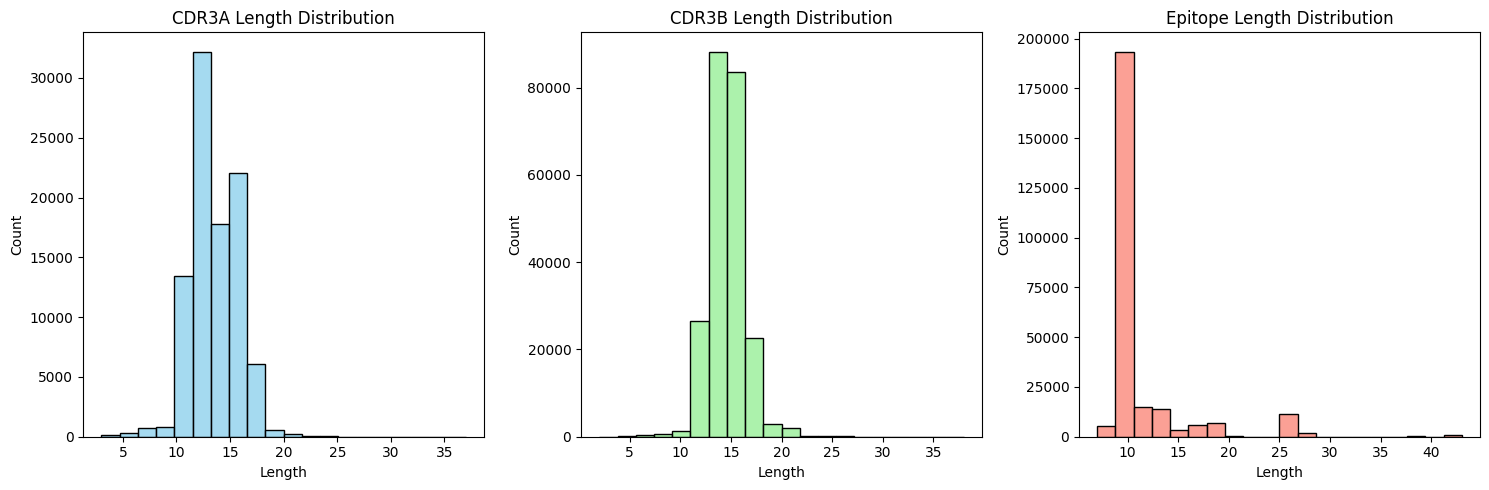

In [8]:
# frequency plot

# Set up the figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms
sns.histplot(data=tcr_data, x='CDR3A_length', ax=ax1, bins=20, color='skyblue')
ax1.set_title('CDR3A Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Count')

sns.histplot(data=tcr_data, x='CDR3B_length', ax=ax2, bins=20, color='lightgreen')
ax2.set_title('CDR3B Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Count')

sns.histplot(data=tcr_data, x='epitope_length', ax=ax3, bins=20, color='salmon')
ax3.set_title('Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

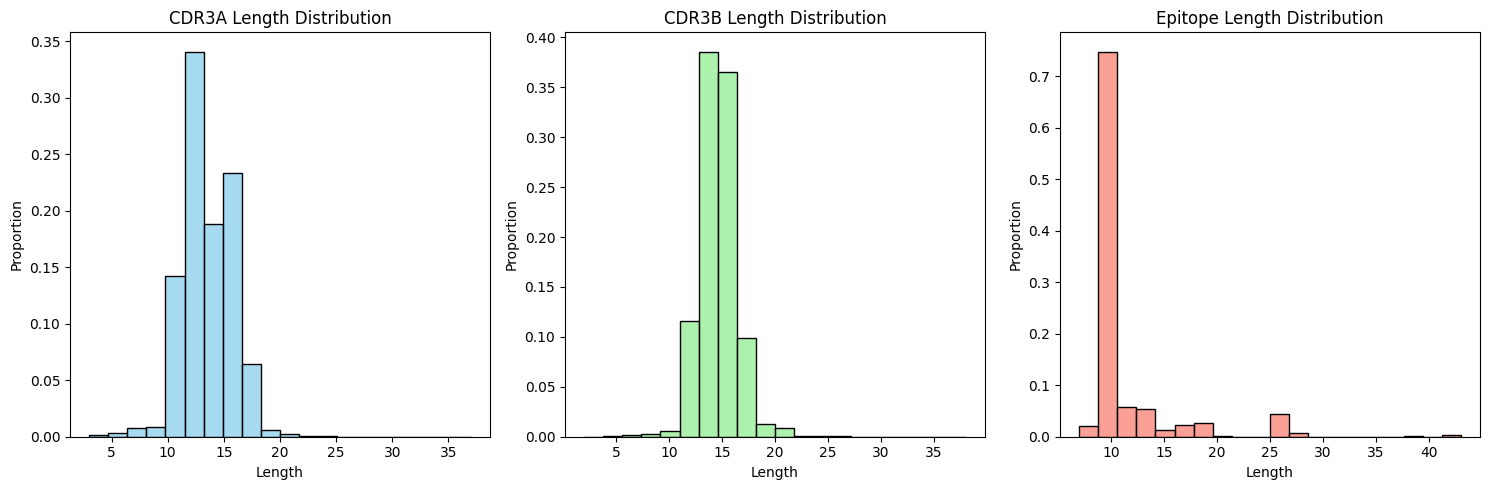

In [9]:
# propotion plot

# Set up the figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms with proportions
sns.histplot(data=tcr_data, x='CDR3A_length', ax=ax1, bins=20, color='skyblue', stat="proportion")
ax1.set_title('CDR3A Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Proportion')

sns.histplot(data=tcr_data, x='CDR3B_length', ax=ax2, bins=20, color='lightgreen', stat="proportion")
ax2.set_title('CDR3B Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Proportion')

sns.histplot(data=tcr_data, x='epitope_length', ax=ax3, bins=20, color='salmon', stat="proportion")
ax3.set_title('Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Proportion')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Check unique values

In [10]:
print( 'CDR3A',tcr_data['CDR3A'].nunique())
print( 'CDR3B',tcr_data['CDR3B'].nunique())
print( 'epitope',tcr_data['epitope'].nunique())

CDR3A 48181
CDR3B 156671
epitope 2108


CDR3A - unique sequences: 48181
Total sequences: 266858 Unique sequences: 48181

CDR3B - unique sequences: 156671
Total sequences: 266858 Unique sequences: 156671

Epitopes - unique sequences: 2108
Total sequences: 266858 Unique sequences: 2108


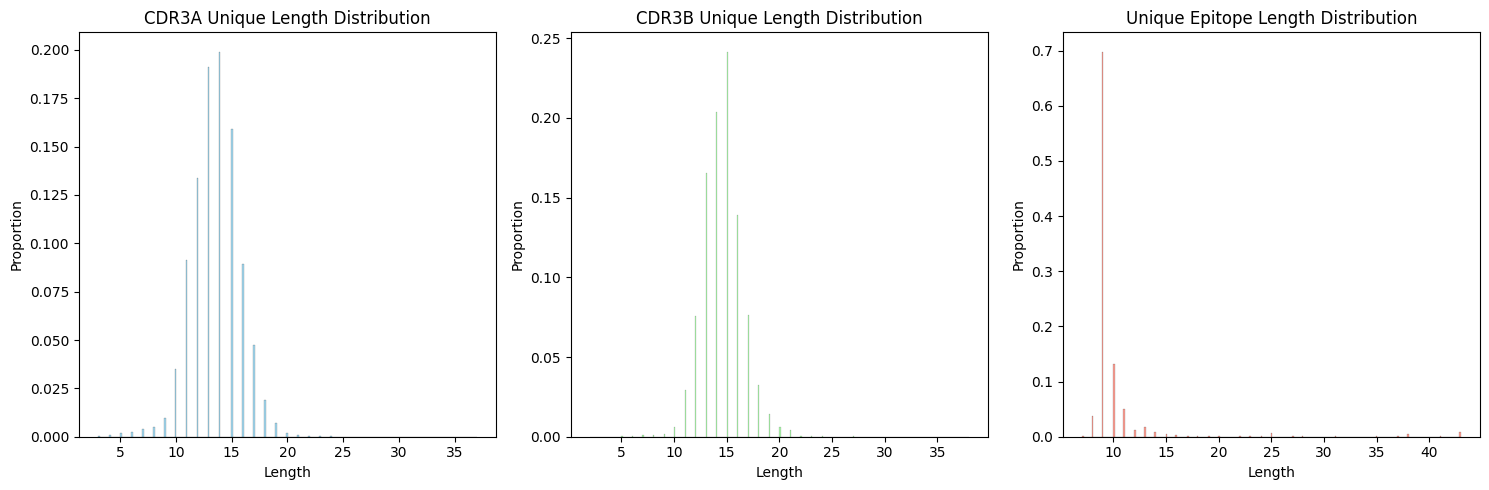

In [11]:
# Get unique sequences and their lengths
unique_cdr3a = tcr_data[['CDR3A', 'CDR3A_length']].dropna().drop_duplicates()
unique_cdr3b = tcr_data[['CDR3B', 'CDR3B_length']].dropna().drop_duplicates()
unique_epitopes = tcr_data[['epitope', 'epitope_length']].dropna().drop_duplicates()

# Print statistics
print("CDR3A - unique sequences:", tcr_data['CDR3A'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_cdr3a))

print("\nCDR3B - unique sequences:", tcr_data['CDR3B'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_cdr3b))

print("\nEpitopes - unique sequences:", tcr_data['epitope'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_epitopes))

# Create plot with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for unique sequences
sns.histplot(data=unique_cdr3a, x='CDR3A_length', ax=ax1, color='skyblue', stat="proportion")
ax1.set_title('CDR3A Unique Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Proportion')

sns.histplot(data=unique_cdr3b, x='CDR3B_length', ax=ax2, color='lightgreen', stat="proportion")
ax2.set_title('CDR3B Unique Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Proportion')

sns.histplot(data=unique_epitopes, x='epitope_length', ax=ax3, color='salmon', stat="proportion")
ax3.set_title('Unique Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

# Check Studies

In [13]:
print( 'Studies',tcr_data['Studies'].nunique())

Studies 1065


Potential studies for validation:

- PMID:38039963
    - Phenotypic signatures of circulating neoantigenreactive CD8+ T cells in patients with metastatic cancers
    - has 14 epitopes and 45 TCRs

- PMID:27959684
    - T-Cell Transfer Therapy Targeting Mutant KRAS in Cancer
    - has 1 epitope and 5 TCRs

- PMID:32461371
    - High-affinity oligoclonal TCRs define effective adoptive T cell therapy targeting mutant KRAS-G12D
    - has 2 epitopes and 4 TCRs




To Do:
- filter on length
- select middle 5 for TCR and peptide
- HLA?